In [3]:
import torch
from kan import *
torch.set_default_dtype(torch.float64)

In [8]:
model=KAN(width=[2,1,1])
f=lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]))+x[:,[1]]**2
dataset=create_dataset(f)

In [9]:
model.train(dataset=dataset,steps=20)

train loss: 1.03e-01 | test loss: 1.02e-01 | reg: 3.38e+00 : 100%|██| 20/20 [00:01<00:00, 13.67it/s]


{'train_loss': [array(0.15371576),
  array(0.10712874),
  array(0.10500482),
  array(0.10472111),
  array(0.10451797),
  array(0.10449543),
  array(0.1030506),
  array(0.10233565),
  array(0.10196308),
  array(0.10163817),
  array(0.10424013),
  array(0.10417204),
  array(0.10408034),
  array(0.1040064),
  array(0.10370219),
  array(0.10368835),
  array(0.10306166),
  array(0.10286667),
  array(0.10276573),
  array(0.10258909)],
 'test_loss': [array(0.14961632),
  array(0.1043816),
  array(0.10244071),
  array(0.10236579),
  array(0.10215794),
  array(0.10202512),
  array(0.10284727),
  array(0.10135947),
  array(0.1014231),
  array(0.10163505),
  array(0.10315629),
  array(0.10274867),
  array(0.10275028),
  array(0.10263221),
  array(0.10307502),
  array(0.10214215),
  array(0.10217049),
  array(0.10185706),
  array(0.10199377),
  array(0.10192103)],
 'reg': [array(2.65033079),
  array(3.10724174),
  array(3.39258183),
  array(3.36075709),
  array(3.40784206),
  array(3.32077892),
  

In [10]:
model2=KAN(width=[2,1,1],grid=10)
model2.initialize_from_another_model(model,dataset['train_input'])

KAN(
  (biases): ModuleList(
    (0-1): 2 x Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [11]:
model2.train(dataset=dataset,steps=20)

train loss: 1.89e-03 | test loss: 1.95e-03 | reg: 4.67e+00 : 100%|██| 20/20 [00:01<00:00, 14.61it/s]


{'train_loss': [array(0.01805644),
  array(0.01589339),
  array(0.00968262),
  array(0.00921592),
  array(0.00790035),
  array(0.00719579),
  array(0.00643274),
  array(0.00535107),
  array(0.00425292),
  array(0.00367951),
  array(0.00324676),
  array(0.00294288),
  array(0.00285982),
  array(0.0025008),
  array(0.00227153),
  array(0.00223581),
  array(0.0021506),
  array(0.0019827),
  array(0.00197102),
  array(0.00189303)],
 'test_loss': [array(0.01925817),
  array(0.01665622),
  array(0.00946138),
  array(0.00899401),
  array(0.00762635),
  array(0.0072542),
  array(0.00668677),
  array(0.00554702),
  array(0.00443015),
  array(0.00370438),
  array(0.0031862),
  array(0.00284977),
  array(0.00285666),
  array(0.00249868),
  array(0.00227335),
  array(0.00226921),
  array(0.002198),
  array(0.00208292),
  array(0.00205208),
  array(0.00195376)],
 'reg': [array(3.42295835),
  array(3.41943311),
  array(3.43080845),
  array(3.44464241),
  array(3.49571719),
  array(3.92338927),
  arr

In [12]:
grids=np.array([5,10,20,50,100])
train_losses=[]
test_losses=[]
steps=50
for i in range(grids.shape[0]):
    if i==0:
        model=KAN(width=[2,1,1],grid=grids[i])
    else:
        model=KAN(width=[2,1,1],grid=grids[i]).initialize_from_another_model(model,dataset['train_input'])
    results=model.train(dataset=dataset,steps=steps,stop_grid_update_step=30)
    train_losses+=results['train_loss']
    test_losses+=results['test_loss']

train loss: 3.08e-02 | test loss: 3.09e-02 | reg: 3.30e+00 : 100%|██| 50/50 [00:03<00:00, 15.94it/s]
train loss: 1.47e-03 | test loss: 1.55e-03 | reg: 3.35e+00 : 100%|██| 50/50 [00:03<00:00, 14.67it/s]
train loss: 4.78e-05 | test loss: 5.16e-05 | reg: 3.38e+00 : 100%|██| 50/50 [00:04<00:00, 10.41it/s]
train loss: 9.96e-07 | test loss: 1.50e-06 | reg: 3.38e+00 : 100%|██| 50/50 [00:07<00:00,  6.33it/s]
train loss: 6.20e-08 | test loss: 1.92e-07 | reg: 3.38e+00 : 100%|██| 50/50 [00:12<00:00,  4.03it/s]


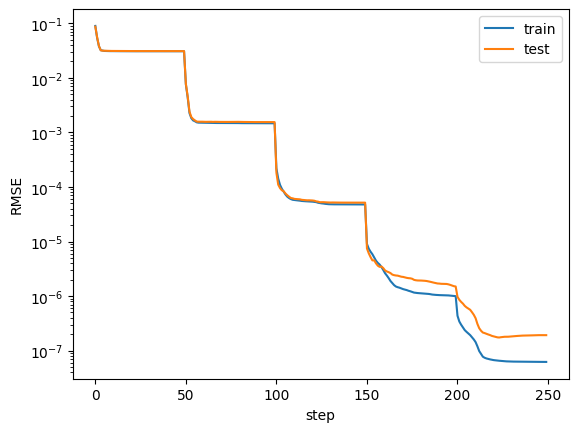

In [18]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')
plt.show()

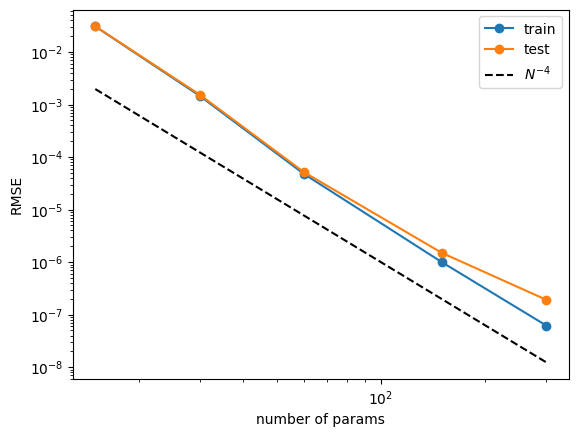

In [19]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')
plt.show()